# Znailla Take Home Exercise - Exploration


## Questions and answers:

### How you frame the problem for training 
- Supervised machine learning; Hyperparameter search with Optuna or autoML/autoAI optimizing the AUC of the ROC; <br>Optionally optimize with a custom metric, like max profit per model; Please see notebook ["Hyperparameter_Tuning_Model"](./HyperParameter_Tuning_Models.ipynb)
- AUC Performance of the original paper can be slightly exceeded, with a very rudimentary setup. 

### Identifying which are the drivers of conversion
- See shap and partial dependence plots; 
- The dataset is from the time shortly before and after the financial crisis. Driver of sales are therefore more emotional than to be expected for a financial decision; <br>This could be incorporated in the call script, especially when calling different customer groups<br>(employ a clustering approach to see groups and create "personas" for each group, so call center employ have a better understanding of what drives purchases for the individual groups; e.g. UMAP --> HDBSCAN --> Inverse UMAP)
        
### What would be your recommendation for the proposed action (cut the number of calls)
- Deploy a ML model to rank the customers depending on how likely they are to take a term deposit. 
- Derive the Cost Adjusted Uplift Cutoff [(CAUC)](#CAUC) value from past data; increase the threshold a bit, to be on the save side
- Based on the CAUC, we can cut 78% of calls, while maximizing profit. The newly free resources can be deployed to drive other outbound marketing campaigns
        
### Cost Optimization 
The head of Marketing adds the following pieces of information:
- Each new contract will generate ~80€ profits over its lifetime
- no new contract would have been signed without the call (it's the only advertising way).<br>Also, we can assume that if a customer didn't buy with the call, he will not buy at any time.

## Result: 
When looking at our test data set, we can derive the following results:

<table style="border-collapse:collapse;border-spacing:0;margin:0px auto" class="tg"><tbody><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:bottom;word-break:normal" colspan="3">Testset&nbsp;&nbsp;&nbsp;population</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal" colspan="2">Overall no. of&nbsp;&nbsp;&nbsp;customers</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">10297</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal" colspan="2">purchased a term deposit</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">1160</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal" colspan="2">did not purchase a&nbsp;&nbsp;&nbsp;term deposit</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">9137</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:bottom;word-break:normal" colspan="3"></td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:bottom;word-break:normal" colspan="3">Profit with and&nbsp;&nbsp;&nbsp;without model based marketing</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">method</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">profit [€]</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">change [%]</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">randomly calling all customers</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">10424</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">0%</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">Cost Adjusted Confusion Matrix</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">22816</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">219%</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">Cost Adjusted Uplift Cutoff</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">45152</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:bottom;word-break:normal">433%</td></tr></tbody></table>

## 00 Getting the prerequisites right
Before we start our little EDA, let’s get some imports out of the way, so we can code more fluently


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#drive.mount("/content/drive", force_remount=True)

In [6]:
# helper function for displaying very big datasets
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [1]:
from pathlib import Path, PureWindowsPath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

from sklearn.inspection import plot_partial_dependence

In [5]:
# main path on colab
# mainPath = Path('/content/drive/MyDrive/Code_for_bothComputers/AllianzTakeHome')

# main path on local machine
mainPath = PureWindowsPath('C:/Users/phili/Google Drive/Code_for_bothComputers')
dataPath = mainPath / '00_data' / 'bank-additional-full.csv'

In [6]:
dataPath

PureWindowsPath('C:/Users/phili/Google Drive/Code_for_bothComputers/00_data/bank-additional-full.csv')

In [9]:
# great lib for interactive vizualisations; just gets more done in shorter time; even more if you have smaller datasets and memory is no problem
#!pip install dtale

In [2]:
import dtale
import dtale.app as dtale_app
# dtale.show(df)

## 01 Reading the data and the description - first sneak peak

In [3]:
df = pd.read_csv('00_data/bank-additional-full.csv', sep=';',header=0);
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As we can see, there is quite a bit of categorical data in it. That usually gives some extra challenges when working with the data, as there are many ways to choose encodings for the data and the respective ML Algos. But that also means some opportunity to play around.
However, the data comes with a description, so let’s have a look at it :)


---



Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   ### Input variables:
    #### bank client data:
    1 - age (numeric)
    
    2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

    3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

    4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    
    5 - default: has credit in default? (categorical: "no","yes","unknown")
    
    6 - housing: has housing loan? (categorical: "no","yes","unknown")
    
    7 - loan: has personal loan? (categorical: "no","yes","unknown")
    
    #### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: "cellular","telephone") 
    
    9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    
    10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    
    11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
    #### other attributes:
    
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
    15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    
    #### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
    
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    
    20 - nr.employed: number of employees - quarterly indicator (numeric)

    ### Output variable (desired target):
    
    21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


## Lets get the EDA going with some packages

We are going to leverage two packages to explore the data - why we use a package and not classical plotting and inspection? 

Because we only have a finite amount of time and interactive visualisations massively cuts down on the time it takes to inspect it.

--> Not recommended, when the dataframes get really big (leverage Spark in that case) 

#### sweetviz

First package we are using is **sweetviz**. We will generate a report and save it to disk so we can have hard copy that we can also distribute to other interested parties. 

It is especially helpful when dealing with categorical values, so you can have it open in a second screen.


In [16]:
import sweetviz as sv

In [17]:
# Analyzing data
report=sv.analyze(df)
# Generating report
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### dtale
The second package is dtale. I found that one not too long ago and it is really great to have an in depth look at the data. 

In [12]:
d = dtale.show(df)
d.open_browser()

In [13]:
d.kill()

Executing shutdown...


2021-08-10 15:22:32,786 - INFO     - Executing shutdown...


# 02 Cleaning the data

After a first glance at the data and the accompanying description, it is pretty clear that we need to do some data cleaning. 
Luckily there is no missing data in the form of "Null" entries. However, missing data often is labelled as "(Other)" or "unknown".

Also we have some columns that have a categories in an ordinal manner. In order to help the models split on it, we should insert our knowledge of the ordering. Not a fun part but needed.

The following challenges have to be solved before we can use the data properly for modelling:
- encode categorical columns
- remove data leakage


#### Mapping some ordered values 

In [4]:
df = pd.read_csv('00_data/bank-additional-full.csv', sep=';',header=0);

In [5]:
# starting with the variables that have order and we want to map
targetMapping = {'no':0, 'yes':1}
educationMapping = {'illiterate':0, 'basic.4y':1, 'basic.6y':1, 'basic.9y':2,
                    'high.school':3,'professional.course':4, 'university.degree':5,
                    'unknown':-999}
dayMapping = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
monthMapping = {'jan': 1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
defaultMapping = {"no":0,"yes":1,"unknown":-999}
housingMapping = {"no":0,"yes":1,"unknown":-999}
loanMapping = {"no":0,"yes":1,"unknown":-999}
poutcomeMapping = {"failure":0,"nonexistent":-999,"success":1}
contactMapping = {'telephone':0, 'cellular':1}

In [6]:
df['y'] = df['y'].map(targetMapping)
df['education'] = df['education'].map(educationMapping)
df['day_of_week'] = df['day_of_week'].map(dayMapping)
df['month'] = df['month'].map(monthMapping)
df['default'] = df['default'].map(defaultMapping)
df['housing'] = df['housing'].map(housingMapping)
df['loan'] = df['loan'].map(loanMapping)
df['poutcome'] = df['poutcome'].map(poutcomeMapping)
df['contact'] = df['contact'].map(contactMapping)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1,0,0,0,0,5,1,...,1,999,0,-999,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,3,-999,0,0,0,5,1,...,1,999,0,-999,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,3,0,1,0,0,5,1,...,1,999,0,-999,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,1,0,0,0,0,5,1,...,1,999,0,-999,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,3,0,0,1,0,5,1,...,1,999,0,-999,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
objCols = df.select_dtypes(include=['object']).columns
categoricalCols = df.select_dtypes(include=['category']).columns
print(f'Columns that are dtype object: \n{objCols}')
print(f'Columns that are dtype object: \n{categoricalCols}')

catCols = list(df.select_dtypes(include=['object', 'category']).columns)

Columns that are dtype object: 
Index(['job', 'marital'], dtype='object')
Columns that are dtype object: 
Index([], dtype='object')


In [9]:
numericalCols = [col for col in df.columns if col not in (catCols + ['y'])];
numericalCols

['age',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

#### data leakage
After reading the documentation on the dataset with some care, we can see that the column duration is a form of data leakage.

"11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."

Therefore we are of course going to remove the column! 

In [10]:
df.drop('duration', axis = 1, inplace = True)

For the further process we will go with catboost. We could use an autoML tool to actually find the best performing model, but as we want a fast and good results, we are going with the catboost model we found on the other notebook. 

Lets save the dataset, so we can use it for other experiments.
As we only have pandas dataframes, I am going to use the feather format to save it. 

In [11]:
d = dtale.show(df)
d.open_browser()

In [ ]:
d.kill()

In [15]:
import feather
df.to_feather('00_data/data_target_cleaned.ftr')

At this point please take a look at the hyperparameter tuning notebook and return at the end of it, so we can separate the tasks a bit. 

Disclaimer: Some partss might be duplicate code. Normally, I would separate that into a utils.py file to have it a bit more clean. 

# 03 last data prep for the model
Before we can start modelling, it is always good to actually take a stratified sample for testing purposes. 
As we don't have too many data points, we will use a cross-validation to train our model. To test our model and to actually score some customers, we will have our test set handy. 

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
y = df.pop('y')

In [17]:
# taking a stratified sample for train test split. 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42, stratify = y)

In [18]:
# for one hot max size parameter
df[catCols].nunique()

job        12
marital     4
dtype: int64

In [19]:
df.dtypes

age                 int64
job                object
marital            object
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

# 04 Loading the model from our modelling notebook


In [20]:
from catboost import CatBoostClassifier
from catboost import Pool, cv
import catboost

To feed data to catboost, we will use the provided catboost.Pool class

In [22]:
#??catboost.Pool

In [21]:
cv_dataset = Pool(data=X_train,
                  label=y_train,
                  cat_features=catCols)

In [22]:
model = CatBoostClassifier()

model.load_model("Catboost_model_trained_OPTUNA20210810_14_10_02")

In [25]:
feature_importance = model.get_feature_importance(cv_dataset, fstr_type=catboost.EFstrType.FeatureImportance, prettified=True)
display_all(feature_importance.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Feature Id,nr.employed,euribor3m,job,contact,pdays,emp.var.rate,month,cons.conf.idx,marital,poutcome,campaign,age,cons.price.idx,previous,day_of_week,default,education,housing,loan
Importances,17.501135,14.916906,11.794647,9.336095,9.101244,8.438314,5.860087,5.806522,4.788199,3.173326,3.002217,1.45482,1.440161,1.161415,1.09457,0.961518,0.116485,0.05234,0.0


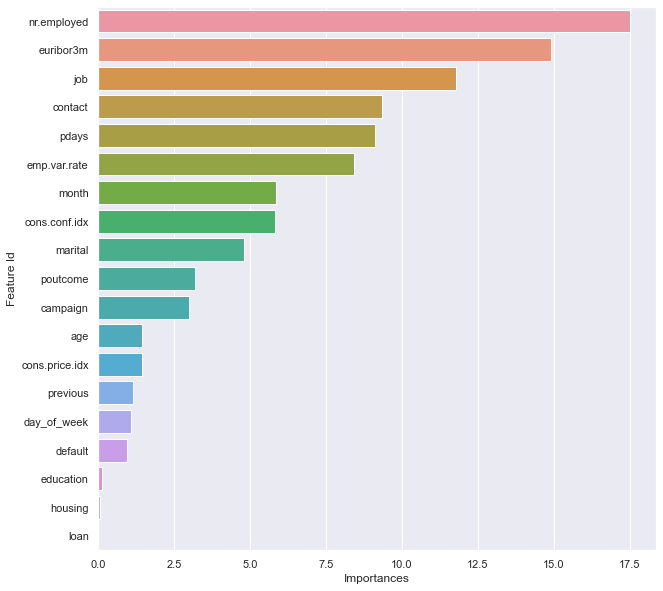

In [26]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y='Feature Id', x = 'Importances', data = feature_importance.iloc[:20])
plt.show()

# 05 Prediction and calculating the cost optimal setup - "Profit is King"

### We have two options: Cost Adjusted Confusion Matrix (CACM) vs Cost Adjusted Uplift Cutoff (CAUC) 
If we want to train and optimize a model, we need to take care of two things:
- Create an optimization metric, that nudges our optimizer to nudge the models hyperparameters towards optimal values to maximize profits. We can achieve that by using a cost adjusted confusion matrix and derive a cost / profit through it, to optimize the hyperparameters of our model. That is most useful, when we plan to contact all customers. E.g. an email campaign. Offering "random" incentives for our customers. 
- If we have a trained model, but we want to be more selective on how many people we contact, we can use a cost adjusted uplift cutoff. The question is the following: After we rank our customers, do we call all available customers, or can we maximize profits by only calling a certain subset of customers; Minimizing the effort to call while maximizing our profits?


In [23]:
preds = model.predict(X_test,prediction_type = 'Probability')

In [24]:
predictions = preds[:,1].reshape(-1,1)

In [25]:
results = pd.DataFrame(data = np.hstack((y_test.values.reshape(-1,1), predictions)), columns = ['label', 'pred_proba'])

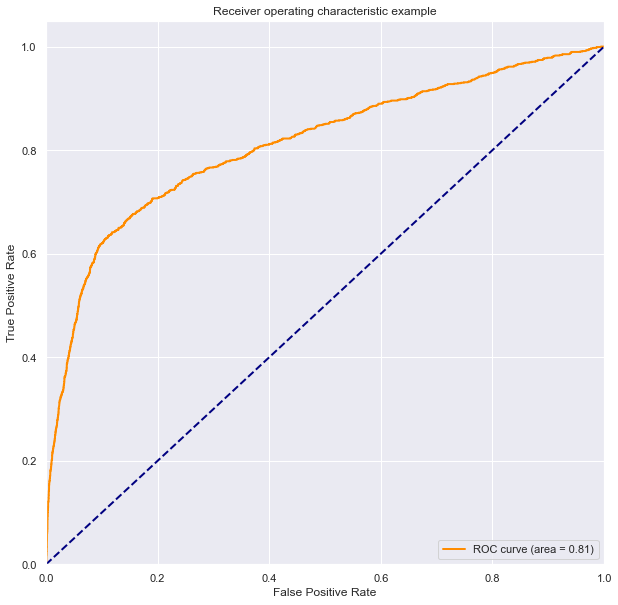

In [30]:
def plotAUC(label,y_pred):
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(label,y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
plotAUC(results.label, results.pred_proba)

### 05a - Cost Adjusted Confusion Matrix (CACM)

In [31]:
from sklearn.metrics import confusion_matrix
#from numba import jit #--> clean calculate the confusion matrix needed in order to avoid call for import


def optimalCostThres(label,y_pred, ptn=0., pfp=-8., pfn=-72., ptp=72.):
    '''
    Calculating the optimal threshold to maximize profit for given prediction probabilities
    
    Parameters
    -------
    label: np.array
        Labels of data points
    y_pred: np.array 
        predicted probabilites 
    ptn: float
        price of a true negative
    pfp: float
        price of a false positve
    pfn: float
        price of a false negative
    ptp: float
        price of a true positive
        
    Returns
    -------
    thres: float
        Threshold to achieve maximum profit for given results 
    profit: float
        Profit that the model acchieves with the optimal threshold.
    '''
    
    priceMatrix = np.array([[ptp,pfn],[pfp,ptn]])
    thresholds = np.arange(0, 1, 0.01)
    costArray = np.hstack((thresholds.reshape(-1,1), np.zeros((thresholds.shape[0],1))))
    
    for i, thres in enumerate(list(thresholds)):
        currentPreds = np.array(y_pred>thres).astype(int)
        CFM = confusion_matrix(label, currentPreds, labels=[1,0])
        profit = (CFM * priceMatrix).sum().sum()
        costArray[i,1] = profit
    
   
    return costArray

costArray = optimalCostThres(results.label, results.pred_proba)

In [32]:
maxRow = np.argmax(costArray,  axis=0)[1]
maxRow
thres, maxProfit = costArray[maxRow,0], costArray[maxRow,1]

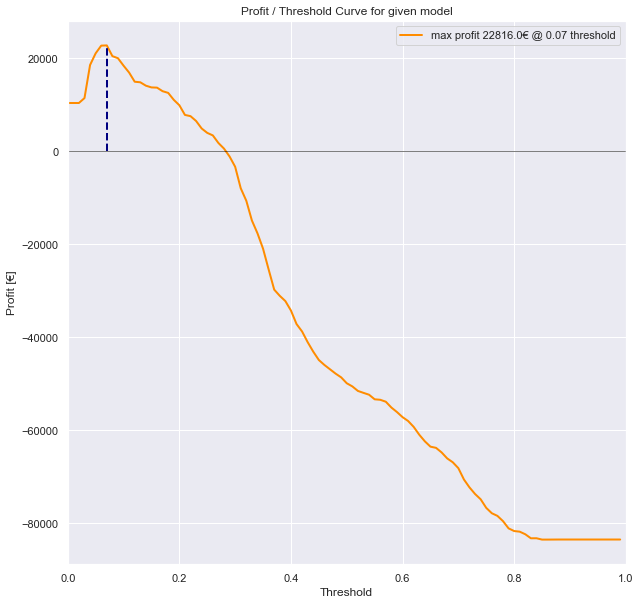

In [33]:
plt.figure()
lw = 2
plt.plot(costArray[:,0], costArray[:,1], color='darkorange',
 lw=lw, label=f'max profit {max(costArray[:,1])}€ @ {thres:.2f} threshold')
plt.plot([0, 1], [0, 1], color='black', lw=0.5, linestyle='-')
plt.plot([thres, thres], [0, maxProfit], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xlabel('Threshold')
plt.ylabel('Profit [€]')
plt.title('Profit / Threshold Curve for given model')
plt.legend(loc="upper right")
plt.show()


### 05b - Cost Adjusted Uplift Cutoff (CAUC) <a id='CAUC'></a>

So this time we will do it a bit different. 
First, we will optimize our model for a certain metric. In our case AUC. After we have found our model with its hyperparameters and it all, we still want to know if we should really call all the people that we have in our customer base.
Clear answer: NO!

This procedure would be only good, if we have no predicitve power and nearly everyone wants our product. 
That is unfortunately nearly never the case. 

So how do we determin how many people we want to call? We look to past data and assume that our dataset has not dramatically shifted. 

Why do we choose AUC? Because it in all essence does exactly what we want. 
Instead of thinking of AUC as just a literal "Area Under Curve" we can imagine it with the following explanation that has been brilliantly described in this article [article](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by google. Please see the following snip below. 
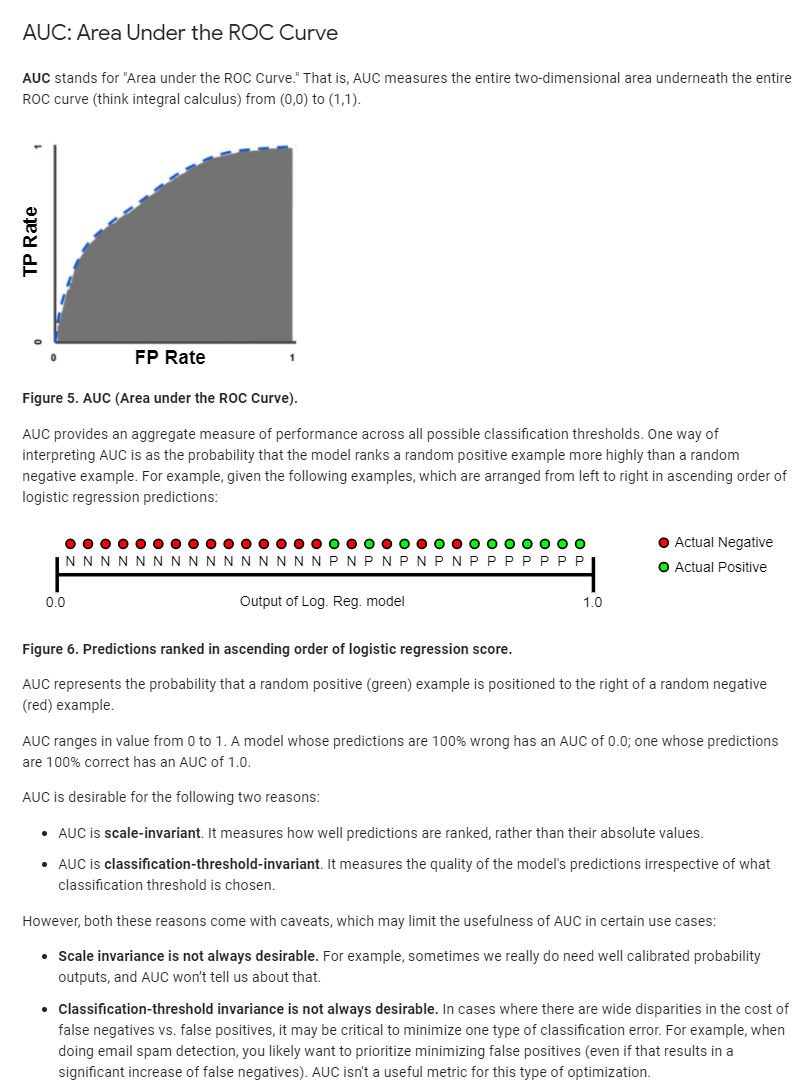 
<center><font color='blue'>(snip from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)</font></center>


AUC is more often than not taken as the default optimization metric for many machine learning problems, without giving much thought to the question if it is the right metric to optimize. However, in our case for the Cost Adjusted Uplift Cutoff it is exactly what we want. 
(In case of the Cost Adjusted Confusion Metric, we should have added this as the custom metric for the optimization process)


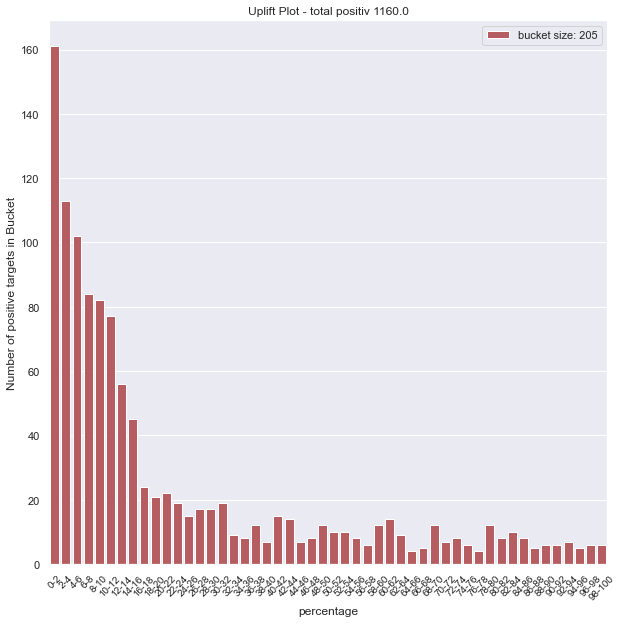

In [34]:
def plotUplift(y_true, y_pred, steps = 50):
    df_scoring = pd.DataFrame({'score':y_pred, 'LABEL':y_true.values}) 
    df_scoring = df_scoring.sort_values(['score'],ascending=False).reset_index()
    df_scoring = df_scoring.drop('index', axis = 1)
    part=int(df_scoring.shape[0]/steps)
    first=2
    firstnew=first
    perc_of_01_train=pd.DataFrame([],columns=['percentage','interval','num_of_1'])
    for i in range(steps):

        perc_of_01_train = perc_of_01_train.append(
            pd.DataFrame([
                [str(round(((part*i)/df_scoring.shape[0])*100)) + '-' + str(round(((part*(i+1))/df_scoring.shape[0])*100)),
                    str(i*part)+'-'+str((i+1)*part),
                    df_scoring.iloc[i*part:(i+1)*part].LABEL.sum()]],
                                                    columns=['percentage','interval','num_of_1']), ignore_index=True)
        firstnew=first*(i+2)
    
    sns.barplot(x="percentage", y="num_of_1", data=perc_of_01_train, color='r', label=f'bucket size: {part}')
    plt.legend(loc="upper right")
    plt.title(f'Uplift Plot - total positiv {df_scoring.LABEL.sum()}')
    plt.xticks(rotation=45, fontsize='small')
    plt.ylabel('Number of positive targets in Bucket')
    plt.show()
    
plotUplift(results.label, results.pred_proba)

In [35]:
# calculating the gain based on the priority --> cumsum 

def costAdjustedRanking(y_true, y_pred, pfp=-8. , ptp=72.):
    '''
    Calculating the cost optimal contact rate
    
    Parameters
    -------
    label: np.array
        Labels of data points
    y_pred: np.array 
        predicted probabilites 
    pfp: float
        price of a false positve
    ptp: float
        price of a true positive
        
    Returns
    -------
    costDf: pd.DataFrame
        Dataframe added with a column of the cummalative profit if contacting all users until certain point
    cutOffThres: float
        threshold where to cut off the contacts in order to maximize profits
    maxProfit:
        Maximum profit to be gained when cutting the contacts at certained point
    
        
    '''

    df = pd.DataFrame({'label':y_true, 'pred':y_pred}) 
    df = df.sort_values(['pred'],ascending=False).reset_index()
    df = df.drop('index', axis = 1)
    df['price'] = np.where(df['label'] == 1, ptp, pfp)
    df['cumsum_price'] = df.price.cumsum()
    df['percentage'] = (np.arange(df.shape[0]) / df.shape[0])*100
    maxRow = df.cumsum_price.idxmax()
    cutOffThres, maxProfit = df.pred.iloc[maxRow], df.cumsum_price.iloc[maxRow]
    
    return df, cutOffThres, maxProfit
costDf, cutOffThres, maxProfit = costAdjustedRanking(results.label, results.pred_proba)

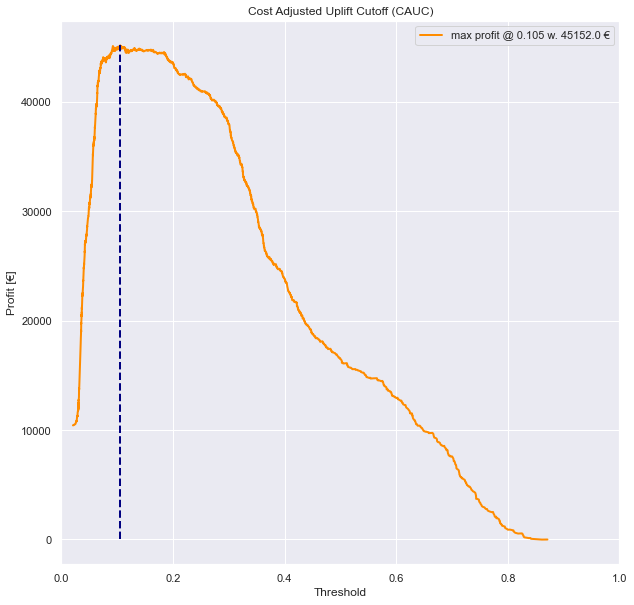

In [36]:
plt.figure()
lw = 2
plt.plot(costDf.pred, costDf.cumsum_price, color='darkorange',
 lw=lw, label=f'max profit @ {cutOffThres:.3f} w. {maxProfit} €')
plt.plot([cutOffThres, cutOffThres], [0, maxProfit], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xlabel('Threshold')
plt.ylabel('Profit [€]')
plt.title('Cost Adjusted Uplift Cutoff (CAUC)')
plt.legend(loc="upper right")
plt.show()


#### How many aalls can be saved? 


In [27]:
saved_calls = results.shape[0] - results[results.pred_proba>0.105].shape[0]
print(saved_calls)
saved_calls/results.shape[0]

8081


0.7847916868990968

**Remark: A firm word of warning of Telemarketing on existing customer base:**
We assume that our population has seen no dramatic shift. However, one has to keep in mind, that if we assume that our product does not majorly increase in popularity, every successful call reduces the possible amount of positive outcomes. 

Just like fishing in a lake. If you take out more fish, than get put back in (customer growth or positive product acceptance trend) at some point it will be no longer economically viable to fish in that lake until it has regenerated its population. 

This is an often overlooked aspect, if you have a small customer population who you can market to and should be kept in mind when running campaigns. Further, aspect like consent to telemarketing might reduce the amount of targets even further.


# 06 What drives conversion? 

In order to answer what drives conversion, we could look at many plots and try to infer something from the differences between people who purchased the product and those who didn't. 

This should be part of every sound data science project! (Talking to the customers who bought it, would maybe be even better though ;) ) 

However, we already jumped through all the hoops to train an excellent model to identify customers who are willing to purchase our product. 

**SHAP allows us to ask our freshly trained "AI Expert for telemarketing".**

--> In depth dive into the drivers when we have the interview.


In [37]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values_overall = explainer(X_test)

# splitting into positive and negatives 
df['target'] = y_test
X_test_pos = df[df.target == 1].drop('target', axis = 1)
X_test_neg = df[df.target == 0].drop('target', axis = 1)

shap_values_pos = explainer(X_test_pos)
shap_values_neg = explainer(X_test_neg)

### SHAP Swarmplot Viz

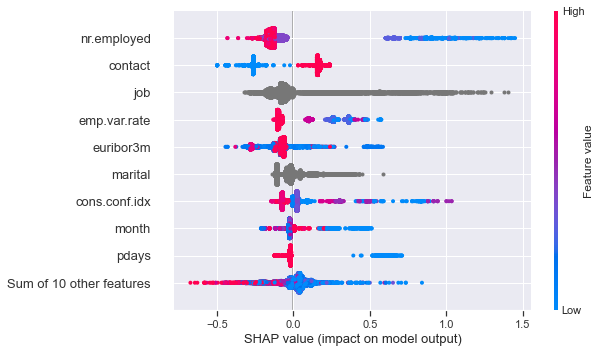

In [38]:
shap.plots.beeswarm(shap_values_overall)

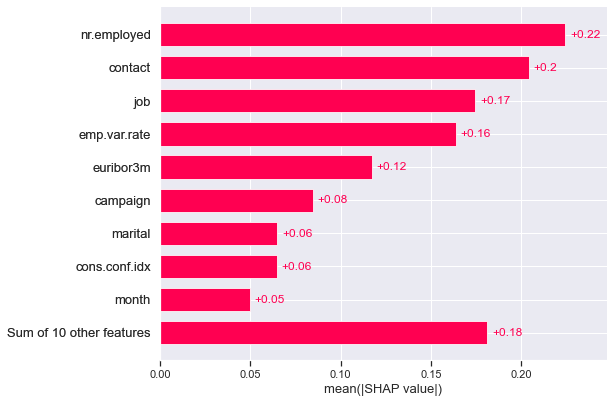

In [39]:
shap.plots.bar(shap_values_overall.abs.mean(0))

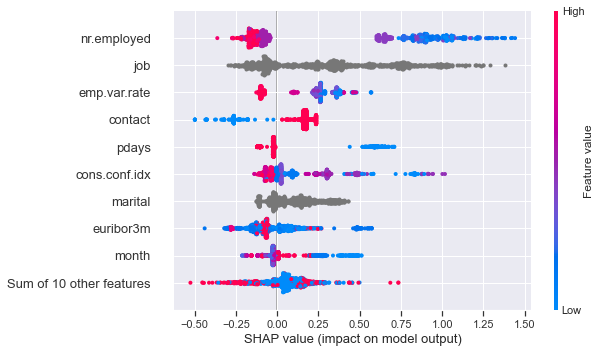

In [40]:
shap.plots.beeswarm(shap_values_pos)

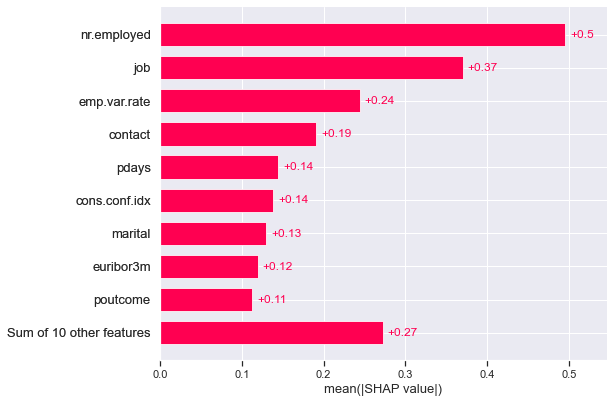

In [41]:
shap.plots.bar(shap_values_pos.abs.mean(0))

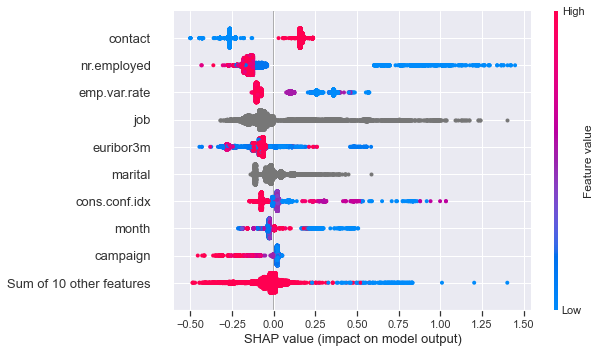

In [42]:
shap.plots.beeswarm(shap_values_neg)

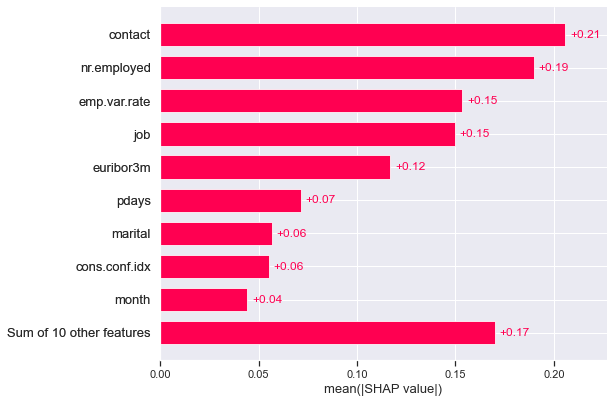

In [43]:
shap.plots.bar(shap_values_neg.abs.mean(0))

In [44]:
df.euribor3m.describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

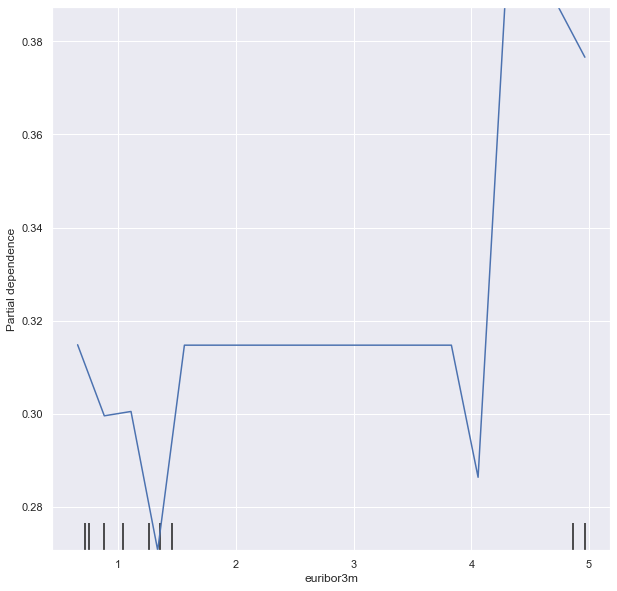

In [45]:
pdp = plot_partial_dependence(model, X_test_pos, features = ['euribor3m'], grid_resolution=20)

In [46]:
depCols = [col for col in X_test_pos.columns if col not in catCols];


In [47]:
??plot_partial_dependence

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
Attempting to set identical bottom == top == 0.30516677502230355 results in singular transformations; automatically expanding.
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
The fig parameter is deprecated i

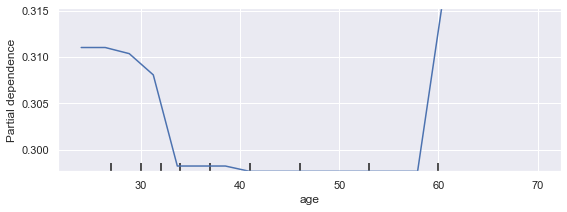

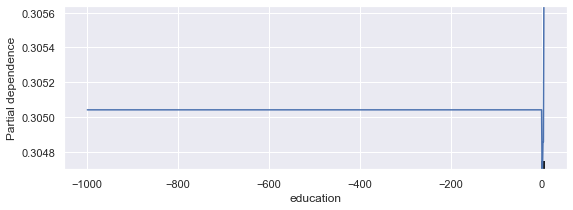

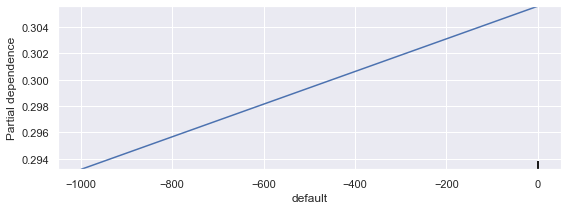

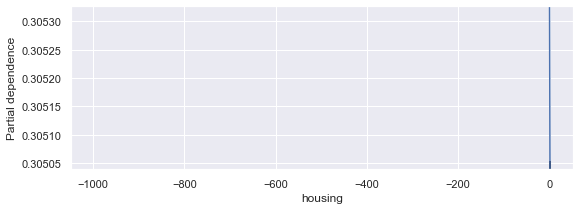

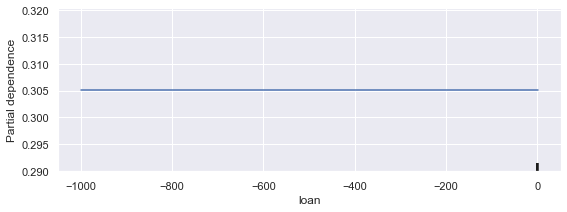

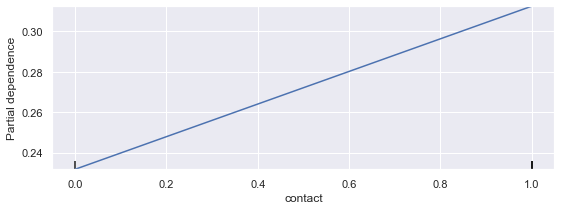

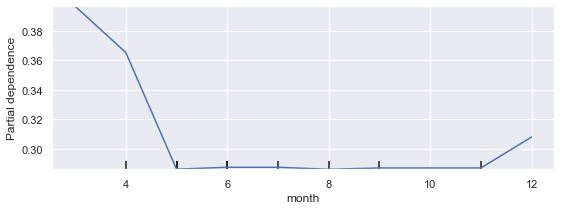

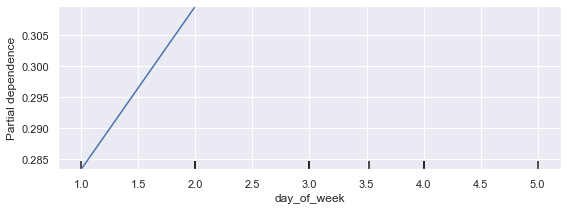

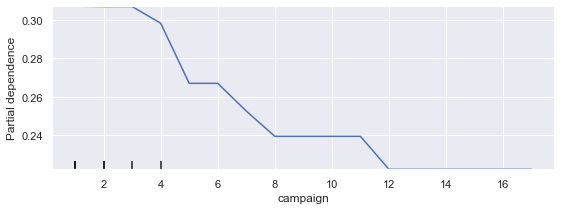

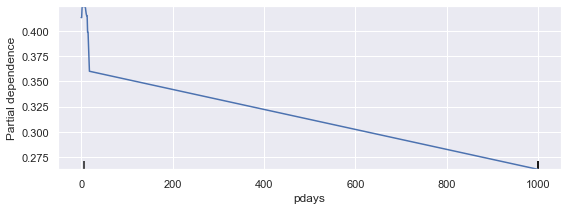

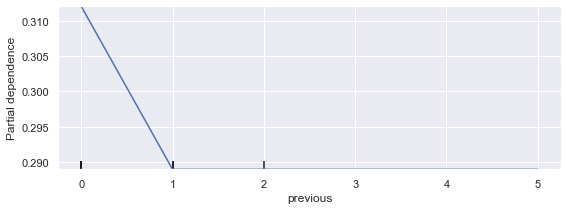

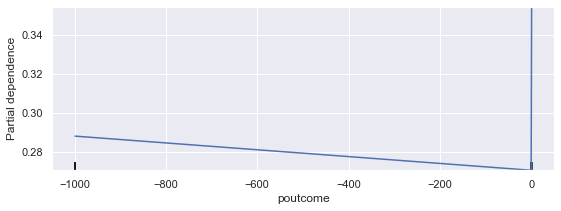

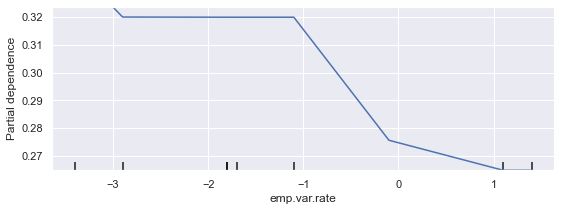

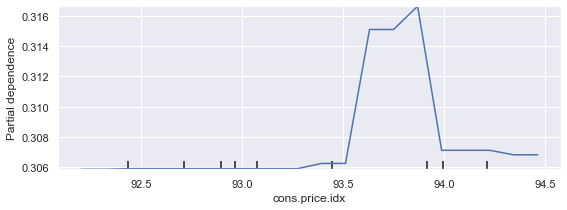

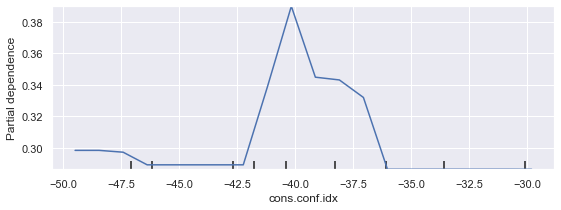

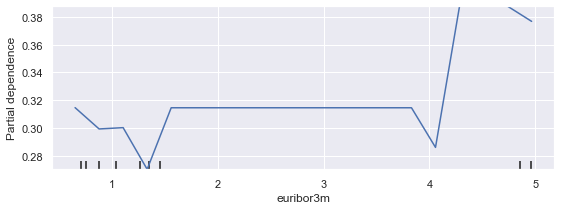

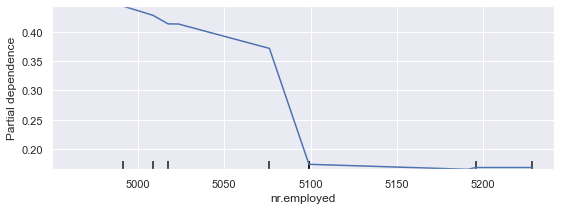

In [48]:
for col in depCols:
    fig = plt.figure(figsize=(9, 3))
    plot_partial_dependence(model, X_test_pos, features = [col], grid_resolution=20, fig = fig)
    savename=  '01_viz/'+str(col)+'.png'
    plt.savefig(savename)
    


### Insights from first viz 

What made me wonder is the following. The euribor3m is down and the market shows an appetite for term deposits? 
That cannot be right. 

I took a look at the original paper "A Data-Driven Approach to Predict the Success of Bank Telemarketing" (https://doi.org/10.1016/j.dss.2014.03.001). 
In the abstract you can read the following: „A Portuguese retail bank was addressed, with data collected from 2008 to 2013, thus including the effects of the recent financial crisis." 

Makes a lot more sense if you look at the Euribor in relation to the financial crisis:
(https://www.euribor-rates.eu/en/current-euribor-rates/2/euribor-rate-3-months/)


<div>
<img src="euribor_chart.jpeg" width="500"/>
</div>


People used term deposits to put their money in a save place during the crisis!